In [1]:
source("../funcs/funcsR.R")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


In [2]:
GMTS = c( "../data/ref/gmts/h.all.v7.0.symbols.gmt.txt","../data/ref/gmts/c2.cp.kegg.v7.0.symbols.gmt.txt")
GMT_list <- c(gmtPathways(GMTS[1]),gmtPathways(GMTS[2]))

## 1. Pathway Enrichment for W-Matrix of ARD-NMF Runs
---

In [3]:
W.df <- read.table("signatures/061721_imputed_res_reg/W_processed.tsv",sep='\t',header=T)
W.e.df <- runAllGSEA(W.df, GMT_list, seed=42, minSize=3, nperm=10000)

write.table(W.e.df, "signatures/061721_imputed_res_reg/W_fgsea.tsv",sep='\t')

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.1% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [8]:
dir.create("figures/signatures/061721_imputed_res_reg")

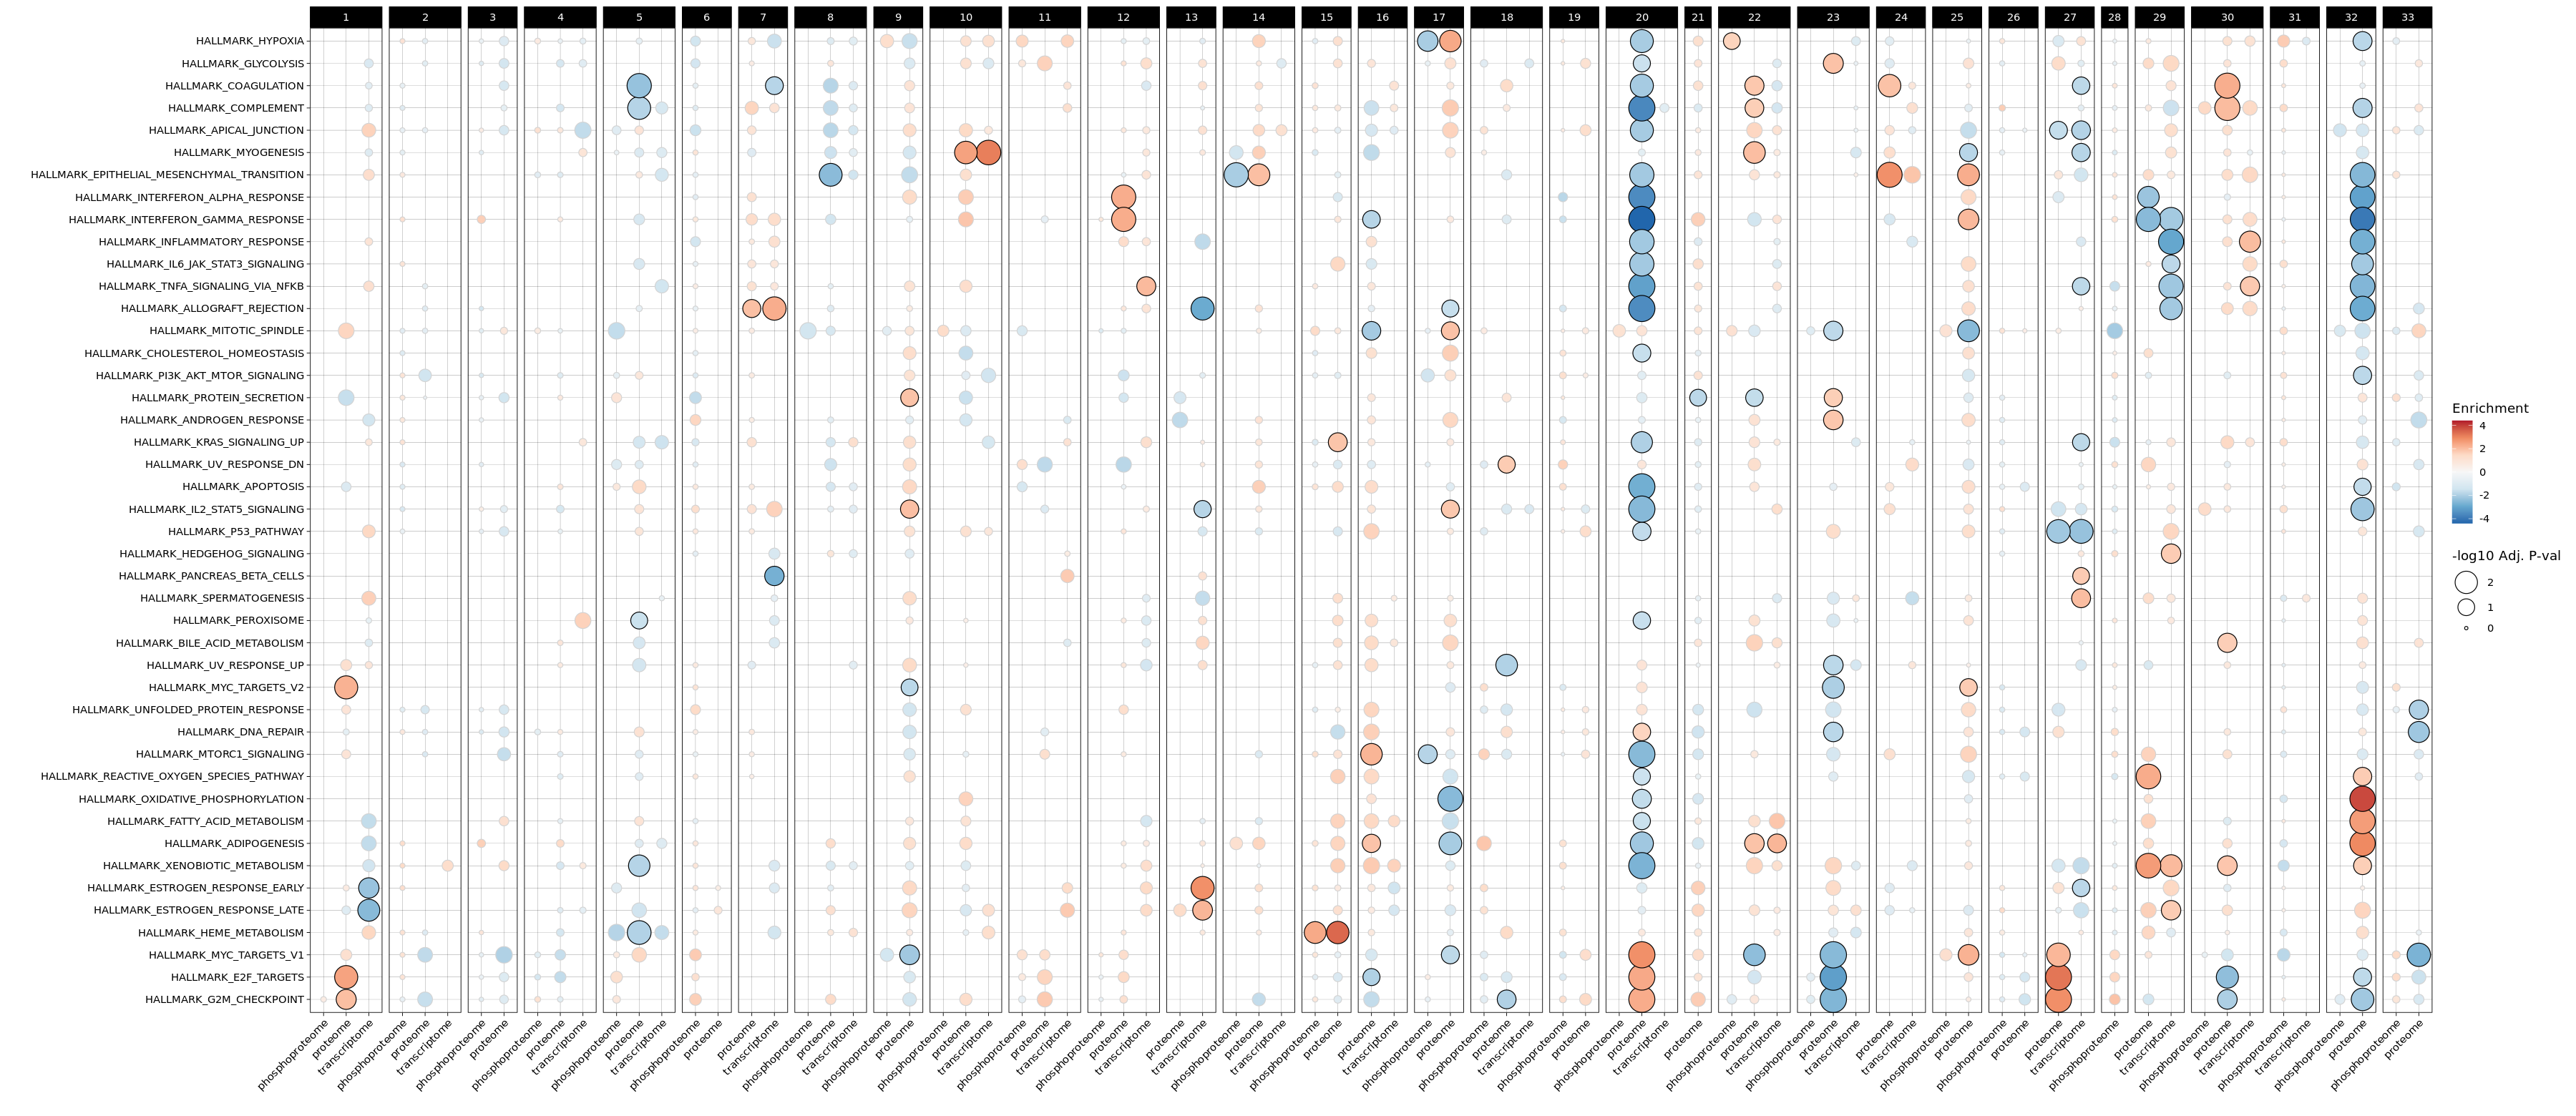

In [4]:
plotGSEA(W.e.df, filter='HALLMARK', w=30)

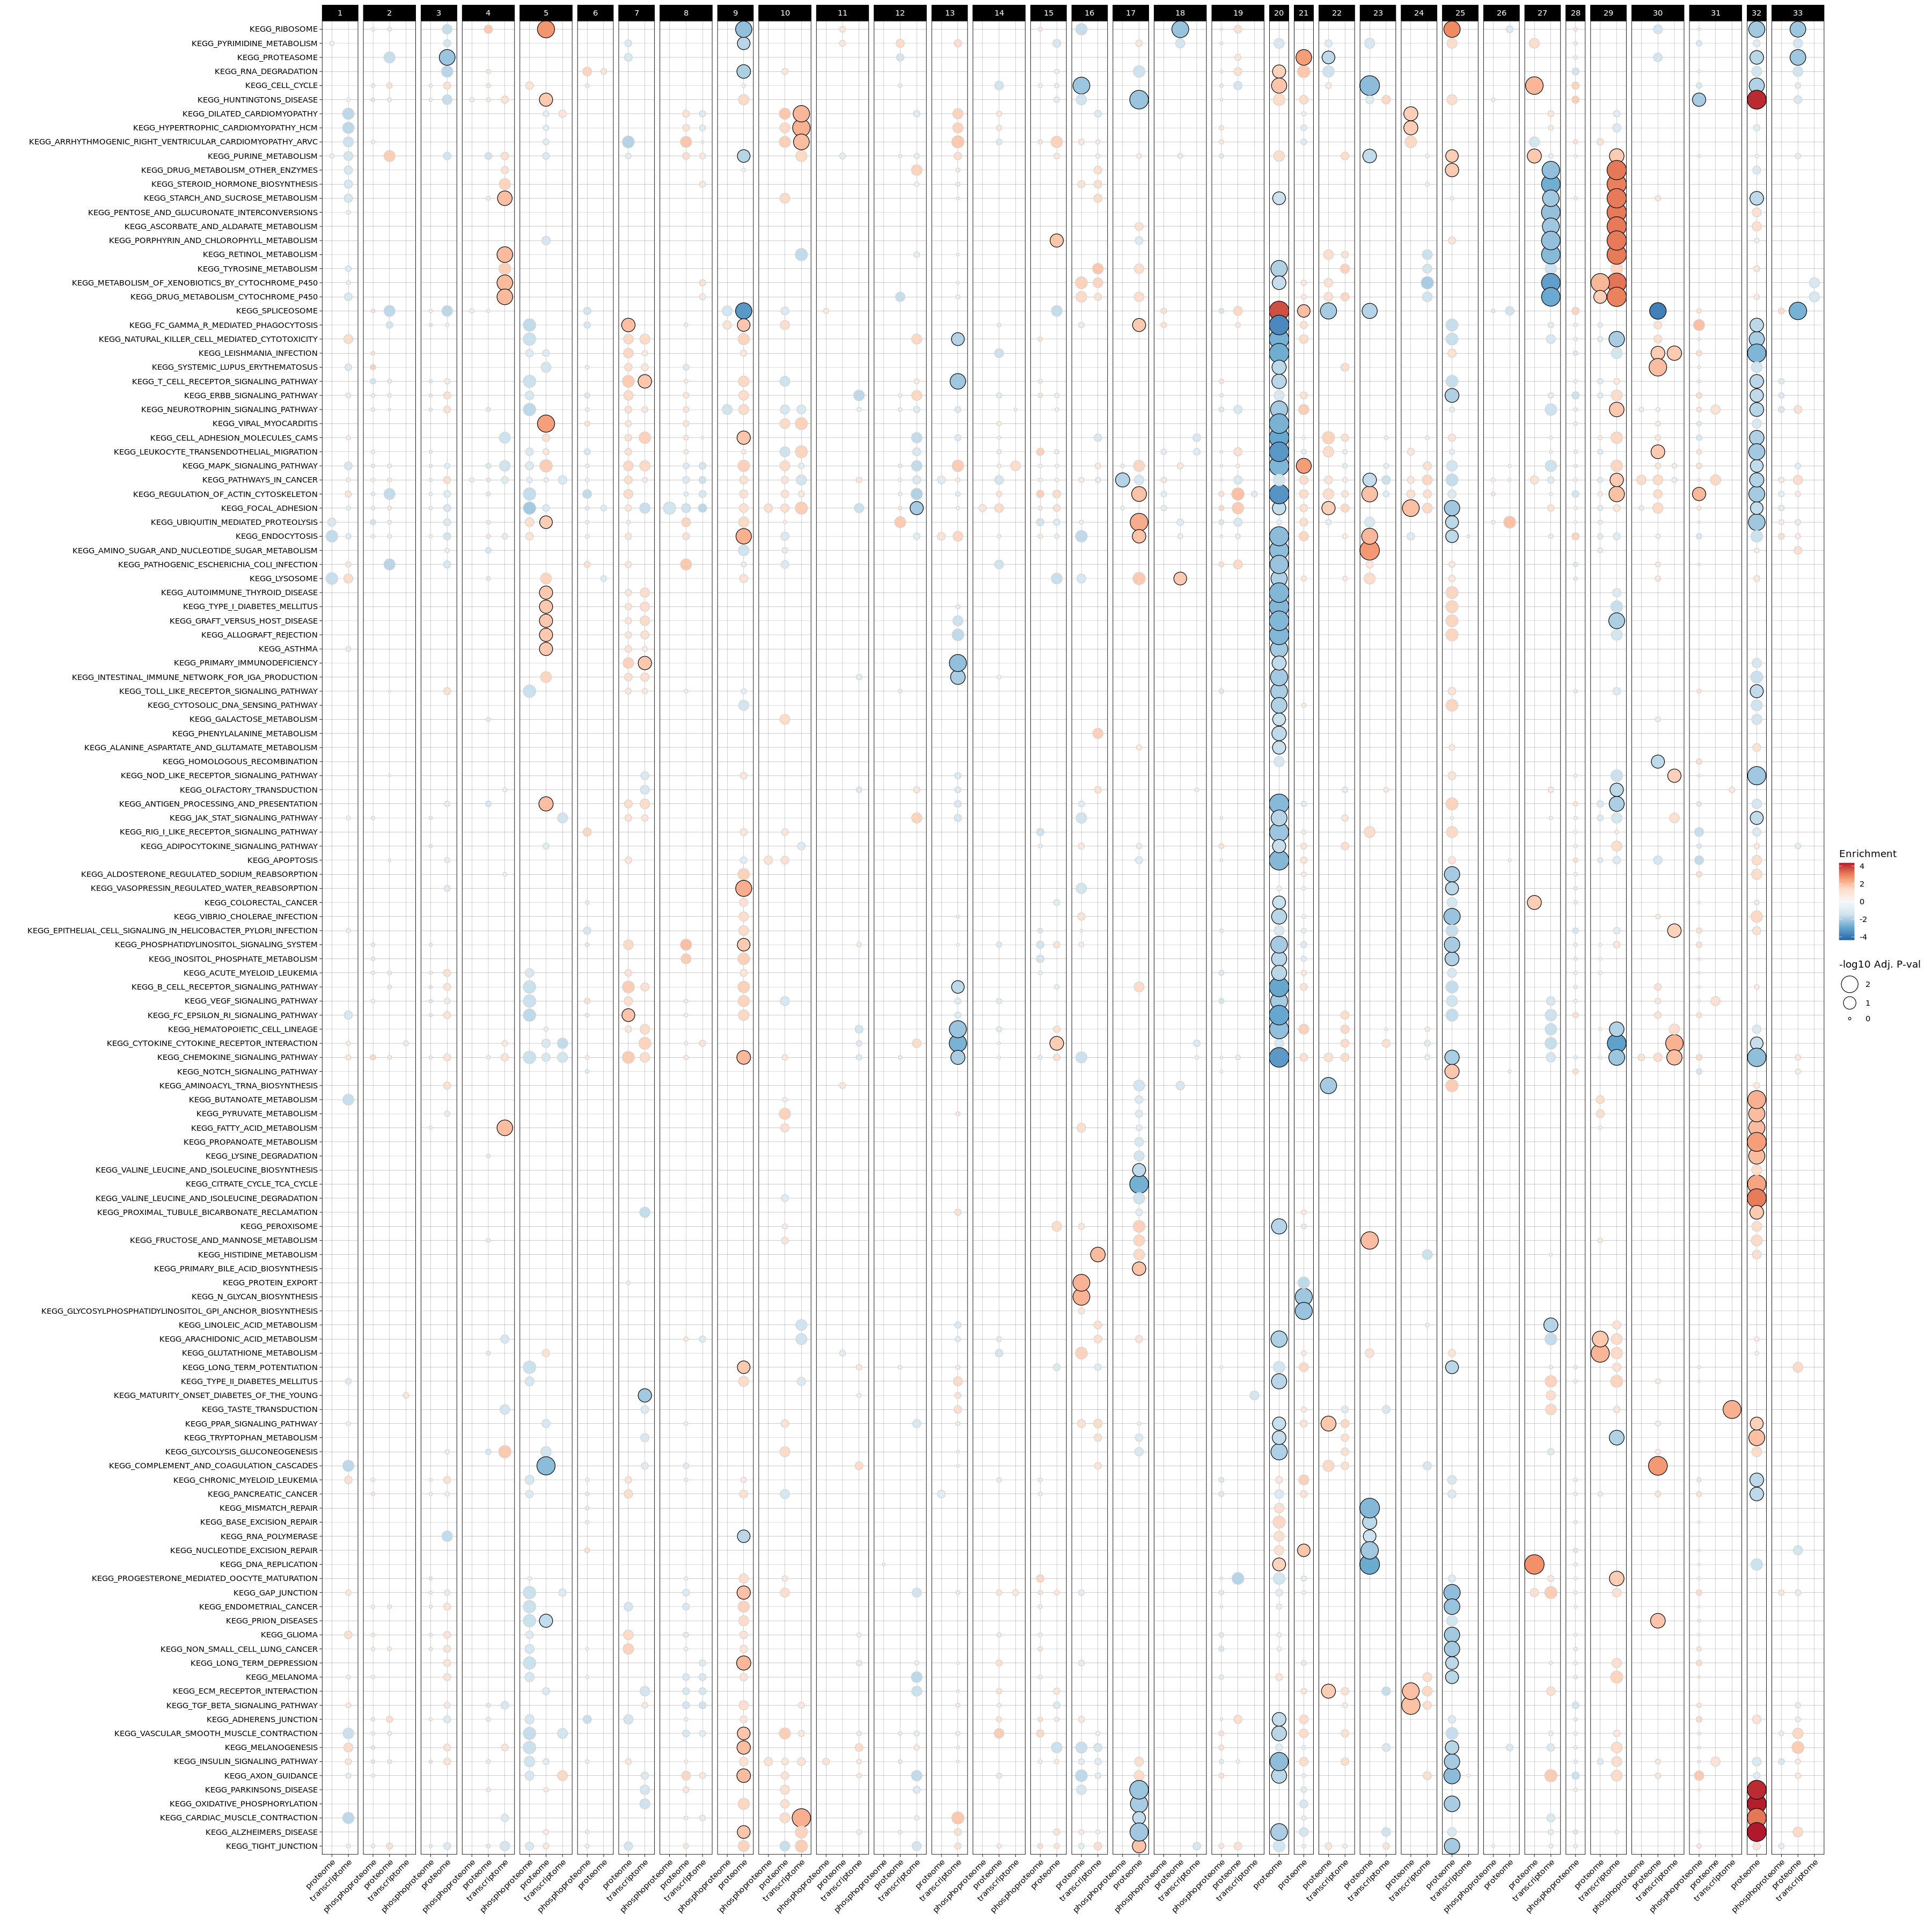

In [5]:
plotGSEA(W.e.df, filter='KEGG', h=30, w=30)

In [9]:
# Figures
pdf("figures/signatures/061721_imputed_res_reg/Wmat_hallmark_balloon.pdf", width=30, height=13) 
plotGSEA(W.e.df, filter='HALLMARK', w=30)
dev.off()

pdf("figures/signatures/061721_imputed_res_reg/Wmat_kegg_balloon.pdf", width=30, height=30) 
plotGSEA(W.e.df, filter='KEGG', h=30, w=30)
dev.off()

png 
  2

png 
  2

## 2. Pathway Enrichment for Dendro Groups
---

### Dendro Groups

In [11]:
de.df <- read.table("diffexp/061721_imputed_res_reg_dendro/full_de_cohort_cov.tsv",sep='\t',header=T)

In [20]:
de.df$abs <- abs(de.df$gsea_rank)

In [27]:
e.de.df <- runAllGSEA(
    de.df, 
    GMT_list, 
    seed=42, 
    group_id="id", 
    weight_id="gsea_rank", 
    gene_id="gene_name", 
    minSize=3, 
    nperm=10000
)

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.64% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.46% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.79% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.09% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.7% of the list).
The order of those 

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.89% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.42% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.92% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [59]:
b1 <- c(12,34,26,16,8,32,21,15,7,4)
b2 <- c(33,37,23,43,25,31,20)
b3 <- c(28,18,14,10,9,6,2)
b4 <- c(19,38,13,36,24,40,29,11,5)
b5 <- c(56,54,39,22,17,3,1)

In [49]:
b_list <- list(b1,b2,b3,b4,b5)

c=1
for (block in b_list){
    e.de.filt.df <- e.de.df[e.de.df$feature %in% c('transcriptome','proteome'),]
    e.de.filt.df <- e.de.filt.df[e.de.filt.df$id %in% block,]
    e.de.filt.df$id <- factor(e.de.filt.df$id, levels=block)
    
    pdf(file.path(paste("figures/signatures/061721_imputed_res_reg/hallmark_balloon_dendro_",c,".pdf", sep='')), width=2*length(block), height=10)
    p <- plotGSEA(e.de.filt.df, filter='HALLMARK', w=2*length(block), h=10)
    print(p)
    dev.off()
    c <- c+1
}

### Dendro Raw Groups

In [31]:
de.df <- read.delim("diffexp/061721_raw_dendro/full_de_cohort_cov.tsv",sep='\t',header=T)

In [32]:
de.df$abs <- abs(de.df$gsea_rank)

In [34]:
e.de.df <- runAllGSEA(
    de.df, 
    GMT_list, 
    seed=42, 
    group_id="id", 
    weight_id="gsea_rank", 
    gene_id="gene_name", 
    minSize=3, 
    nperm=10000
)

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.85% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.46% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.78% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.2% of the list).
The order of those 

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.54% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (3.45% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.66% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.4% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.02% of the list).
The order of those 

In [35]:
b1 <- c(12,34,26,16,8,32,21,15,7,4)
b2 <- c(33,37,23,43,25,31,20)
b3 <- c(28,18,14,10,9,6,2)
b4 <- c(19,38,13,36,24,40,29,11,5)
b5 <- c(56,54,39,22,17,3,1)

In [36]:
b_list <- list(b1,b2,b3,b4,b5)

c=1
for (block in b_list){
    e.de.filt.df <- e.de.df[e.de.df$feature %in% c('transcriptome','proteome'),]
    e.de.filt.df <- e.de.filt.df[e.de.filt.df$id %in% block,]
    e.de.filt.df$id <- factor(e.de.filt.df$id, levels=block)
    
    pdf(file.path(paste("figures/signatures/061721_imputed_res_reg/hallmark_raw_balloon_dendro_",c,".pdf", sep='')), width=2*length(block), height=10)
    p <- plotGSEA(e.de.filt.df, filter='HALLMARK', w=2*length(block), h=10)
    print(p)
    dev.off()
    c <- c+1
}

### Mutations

In [37]:
de.df <- read.delim("diffexp/061721_raw_muts/full_de_cohort_cov.tsv",sep='\t',header=T)

In [38]:
de.df$abs <- abs(de.df$gsea_rank)

In [39]:
e.de.df <- runAllGSEA(
    de.df, 
    GMT_list, 
    seed=42, 
    group_id="id", 
    weight_id="gsea_rank", 
    gene_id="gene_name", 
    minSize=3, 
    nperm=10000
)

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.89% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.47% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.7% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.21% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.74% of the list).
The order of those 

In [44]:
pdf("figures/signatures/061721_imputed_res_reg/muts_raw_balloon.pdf", width=45, height=10)
plotGSEA(e.de.df, filter='HALLMARK', w=45, h=10)
dev.off()

png 
  2

In [47]:
ddr <- c('KEGG_BASE_EXCISION_REPAIR',
'KEGG_MISMATCH_REPAIR',
'KEGG_HOMOLOGOUS_RECOMBINATION',
'KEGG_NON_HOMOLOGOUS_END_JOINING',
'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
'HALLMARK_E2F_TARGETS',
'HALLMARK_G2M_CHECKPOINT',
'HALLMARK_DNA_REPAIR')

In [49]:
e.ddr.de.df <- e.de.df[e.de.df$pathway %in% ddr, ]

In [53]:
pdf("figures/signatures/061721_imputed_res_reg/muts_ddr_raw_balloon.pdf", width=45, height=4)
plotGSEA(e.ddr.de.df, w=45, h=4)
dev.off()

png 
  2

## 3. PTM-GSEA Results
---

### W-Matrix

In [55]:
wmat.ptm.df <- read.delim("signatures/061721_imputed_res_reg/ptmgsea_wmat/phosph_de-combined.tsv", sep='\t', header=T) 

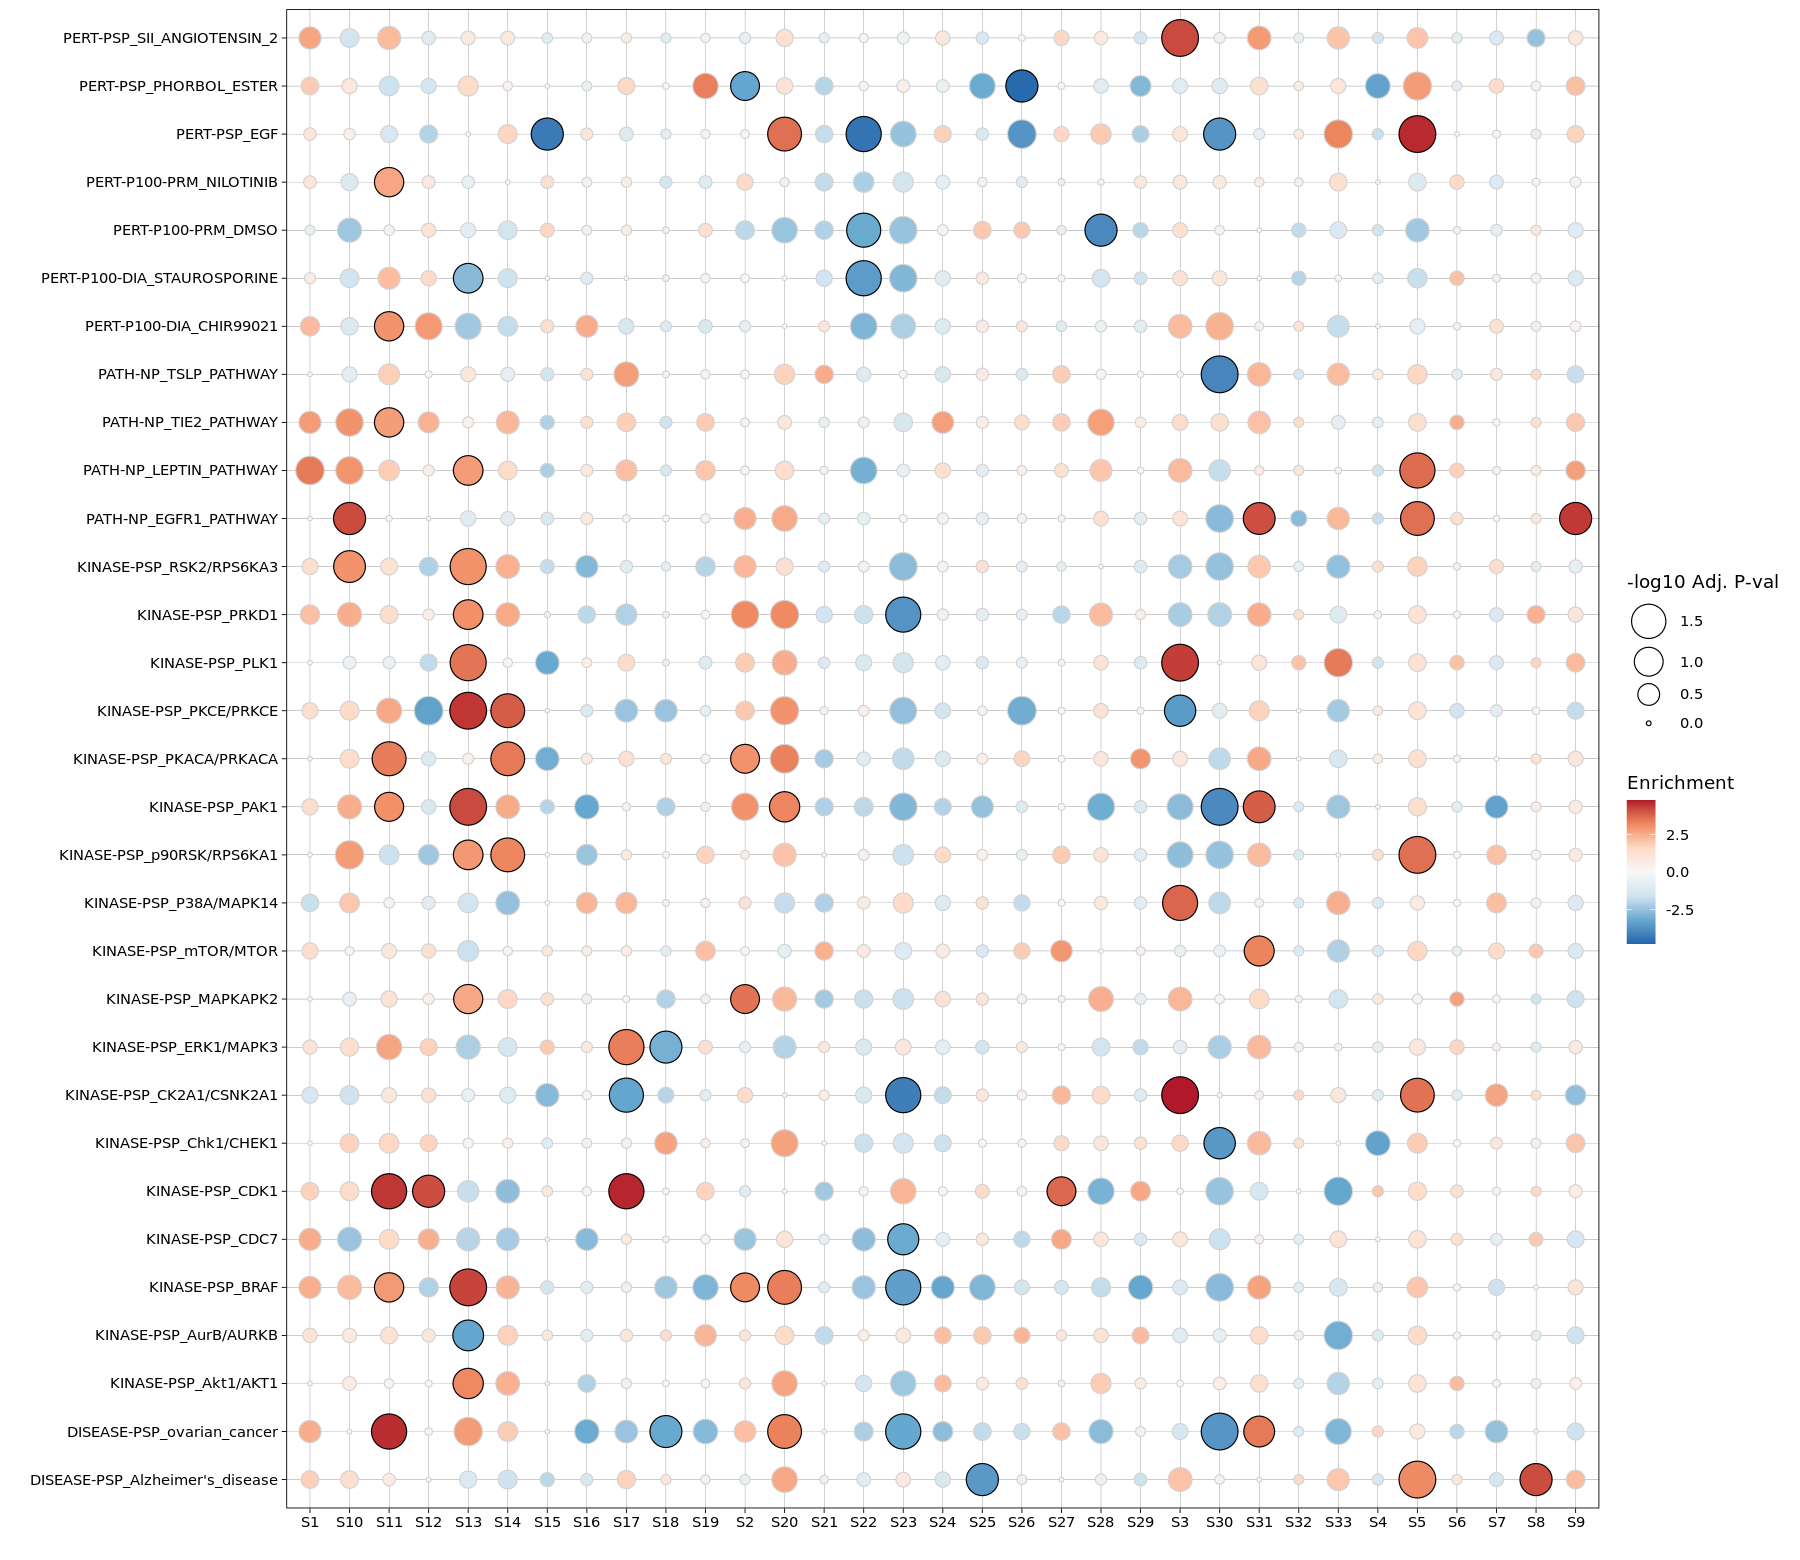

In [62]:
plotPTMGSEA(wmat.ptm.df)

### Dendro Groups

In [57]:
dendro.ptm.df <- read.delim("diffexp/061721_imputed_res_reg_dendro/ptmgsea_cohort_cov/phosph_de_cohort_cov-combined.tsv", sep='\t', header=T) 

In [67]:
b_order <- c(b1,b2,b3,b4,b5)
dendro.ptm.df$id <- factor(dendro.ptm.df$id, levels=b_order)

In [73]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_dendro_balloon.pdf", width=20, height=13)
plotPTMGSEA(dendro.ptm.df, w=20, h=13)
dev.off()

png 
  2

### Dendro Raw Groups

In [69]:
dendro.ptm.df <- read.delim("diffexp/061721_raw_dendro/ptmgsea_cohort_cov/phosph_de_cohort_cov-combined.tsv", sep='\t', header=T) 
b_order <- c(b1,b2,b3,b4,b5)
dendro.ptm.df$id <- factor(dendro.ptm.df$id, levels=b_order)

In [79]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_raw_kinase_dendro_balloon.pdf", width=16, height=24)
plotPTMGSEA(dendro.ptm.df, filter="KINASE", w=16, h=24)
dev.off()

Warning message:
“Removed 1151 rows containing missing values (geom_point).”


png 
  2

In [87]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_raw_path_dendro_balloon.pdf", width=16, height=10)
plotPTMGSEA(dendro.ptm.df, filter="PATH", w=16, h=10)
dev.off()

Warning message:
“Removed 294 rows containing missing values (geom_point).”


png 
  2

In [86]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_raw_disease_dendro_balloon.pdf", width=16, height=6)
plotPTMGSEA(dendro.ptm.df, filter="DISEASE", w=16, h=6)
dev.off()

Warning message:
“Removed 158 rows containing missing values (geom_point).”


png 
  2

In [91]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_raw_pert_dendro_balloon.pdf", width=16, height=24)
plotPTMGSEA(dendro.ptm.df, filter="PERT", w=16, h=24)
dev.off()

Warning message:
“Removed 1048 rows containing missing values (geom_point).”


png 
  2

### Mutations

In [101]:
dendro.ptm.df <- read.delim("diffexp/061721_raw_muts/ptmgsea_cohort_cov/phosph_de_cohort_cov-combined.tsv", sep='\t', header=T) 

In [109]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_raw_kinase_muts_balloon.pdf", width=14, height=20)
p <- plotPTMGSEA(dendro.ptm.df, filter="KINASE", w=14, h=20)
p + theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

Warning message:
“Removed 322 rows containing missing values (geom_point).”


png 
  2

In [113]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_raw_path_muts_balloon.pdf", width=14, height=12)
p <- plotPTMGSEA(dendro.ptm.df, filter="PATH", w=14, h=12)
p + theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

Warning message:
“Removed 103 rows containing missing values (geom_point).”


png 
  2

In [118]:
pdf("figures/signatures/061721_imputed_res_reg/ptmgsea_raw_disease_muts_balloon.pdf", width=14, height=4)
p <- plotPTMGSEA(dendro.ptm.df, filter="DISEASE", w=14, h=4)
p + theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

Warning message:
“Removed 66 rows containing missing values (geom_point).”


png 
  2

## 4. CIBERSORT
---

In [63]:
GMT_list_staudt <- c(gmtPathways("../data/ref/gmts/staudt_2020_filt.txt"))

### W-Matrix

In [64]:
W.df <- read.table("signatures/061721_imputed_res_reg/W_processed.tsv",sep='\t',header=T)
W.e.df <- runAllGSEA(W.df, GMT_list_staudt, seed=42, minSize=3, nperm=10000)

write.table(W.e.df, "signatures/061721_imputed_res_reg/W_staudt_fgsea.tsv",sep='\t')

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.1% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [68]:
# Figures
pdf("figures/signatures/061721_imputed_res_reg/Wmat_cibersort_balloon.pdf", width=12, height=8) 
plotGSEA(W.e.df, filter='Newman', w=12, h=8)
dev.off()

png 
  2

### Dendro Groups

In [82]:
de.df <- read.table("diffexp/061721_imputed_res_reg_dendro/full_de_cohort_cov.tsv",sep='\t',header=T)
de.df$abs <- abs(de.df$gsea_rank)
e.de.df <- runAllGSEA(
    de.df, 
    GMT_list_staudt, 
    group_id="id", 
    weight_id="gsea_rank",
    gene_id="gene_name",
    seed=42, 
    minSize=3, 
    nperm=10000
)
write.table(e.de.df, "diffexp/061721_imputed_res_reg_dendro/staudt_fgsea.tsv",sep='\t')

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.64% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.46% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.79% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.09% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.7% of the list).
The order of those 

Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.54% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.57% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.4% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.4% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (2.89% of the list).
The order of those t

In [83]:
e.t.de.df <- e.de.df[e.de.df$feature=='transcriptome',]
e.t.de.df$id <- factor(e.t.de.df$id, levels=b_order)

In [93]:
pdf("figures/signatures/061721_imputed_res_reg/cibersort_dendro_balloon.pdf", width=20, height=8) 
plotCiberGSEA(e.t.de.df, filter='Newman', h=8, w=20)
dev.off()

png 
  2

### Dendro Raw Groups

In [55]:
de.df <- read.table("diffexp/061721_raw_dendro/full_de_cohort_cov.tsv",sep='\t',header=T)
de.df$abs <- abs(de.df$gsea_rank)
e.de.df <- runAllGSEA(
    de.df, 
    GMT_list_staudt, 
    group_id="id", 
    weight_id="gsea_rank",
    gene_id="gene_name",
    seed=42, 
    minSize=3, 
    nperm=10000
)
write.table(e.de.df, "diffexp/061721_raw_dendro/staudt_fgsea.tsv",sep='\t')

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (1.85% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.46% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(gmts, R, nperm, minSize = minSize, ...):
“There are ties in th

In [60]:
b_order <- c(b1,b2,b3,b4,b5)

In [61]:
e.de.df$id <- factor(e.de.df$id, levels=b_order)

In [62]:
pdf("figures/signatures/061721_imputed_res_reg/cibersort_raw_balloon.pdf", width=45, height=10)
plotGSEA(e.de.df, filter='Newman', w=45, h=10)
dev.off()

png 
  2

---